In [1]:
pip install summa


Note: you may need to restart the kernel to use updated packages.


In [2]:
from summa import summarizer

def summarize_chapter(chapter_text, ratio=0.2):

    # Summarize the chapter text using TextRank algorithm
    summary = summarizer.summarize(chapter_text, ratio=ratio)

    # Split the summary into bullet points
    summary_bullet_points = summary.split('\n')

    return summary_bullet_points

# Example chapter text (you can replace this with your chapter text)
chapter_text = """
Morphological analysis
Lemmatization
The task of removing inflectional endings only and to return the base dictionary form of a word which is also known as a lemma. Lemmatization is another technique for reducing words to their normalized form. But in this case, the transformation actually uses a dictionary to map words to their actual form.[24]
Morphological segmentation
Separate words into individual morphemes and identify the class of the morphemes. The difficulty of this task depends greatly on the complexity of the morphology (i.e., the structure of words) of the language being considered. English has fairly simple morphology, especially inflectional morphology, and thus it is often possible to ignore this task entirely and simply model all possible forms of a word (e.g., "open, opens, opened, opening") as separate words. In languages such as Turkish or Meitei, a highly agglutinated Indian language, however, such an approach is not possible, as each dictionary entry has thousands of possible word forms.[25]
Part-of-speech tagging
Given a sentence, determine the part of speech (POS) for each word. Many words, especially common ones, can serve as multiple parts of speech. For example, "book" can be a noun ("the book on the table") or verb ("to book a flight"); "set" can be a noun, verb or adjective; and "out" can be any of at least five different parts of speech.
Stemming
The process of reducing inflected (or sometimes derived) words to a base form (e.g., "close" will be the root for "closed", "closing", "close", "closer" etc.). Stemming yields similar results as lemmatization, but does so on grounds of rules, not a dictionary.
"""

# Summarize the chapter into bullet points and store in a variable
chapter_summary = summarize_chapter(chapter_text)

# Print the summarized bullet points
for point in chapter_summary:
    print(f"- {point}")

# Store the summary in a variable
summary_variable = "\n".join(chapter_summary)

# Print the summary variable
print(summary_variable)


- The task of removing inflectional endings only and to return the base dictionary form of a word which is also known as a lemma.
- Lemmatization is another technique for reducing words to their normalized form.
- English has fairly simple morphology, especially inflectional morphology, and thus it is often possible to ignore this task entirely and simply model all possible forms of a word (e.g., "open, opens, opened, opening") as separate words.
The task of removing inflectional endings only and to return the base dictionary form of a word which is also known as a lemma.
Lemmatization is another technique for reducing words to their normalized form.
English has fairly simple morphology, especially inflectional morphology, and thus it is often possible to ignore this task entirely and simply model all possible forms of a word (e.g., "open, opens, opened, opening") as separate words.


In [3]:
from PIL import Image, ImageDraw, ImageFont

def text_to_image(text, image_path, font_path=None, font_size=40, image_width=1500, image_height=700):
    # Create a blank image with white background
    img = Image.new('RGB', (image_width, image_height), color=(255, 255, 255))

    # Initialize the drawing context
    draw = ImageDraw.Draw(img)

    # Specify font (optional)
    if font_path:
        font = ImageFont.truetype(font_path, font_size)
    else:
        font = ImageFont.load_default()

    # Calculate text size and position using textbbox
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    text_x = (image_width - text_width) / 2
    text_y = (image_height - text_height) / 2

    # Draw text on the image
    draw.text((text_x, text_y), text, fill=(0, 0, 0), font=font)

    # Save the image
    img.save(image_path)

# Example usage
text = summary_variable
image_path = "output_image.png"
font_path = "arial.ttf"  # Path to a TrueType font file (optional)
text_to_image(text, image_path)


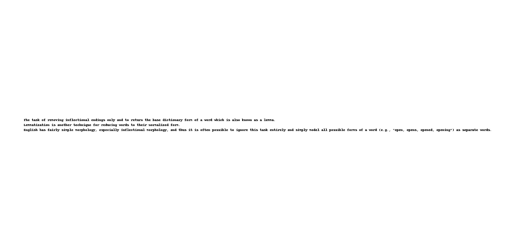

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "output_image.png"
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
import nltk
import random

# Download the punkt tokenizer if not already downloaded
nltk.download('punkt')

def generate_quiz(text, num_questions=5):
    # Tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    # Shuffle the sentences to randomize question selection
    random.shuffle(sentences)

    # Select a subset of sentences to use as questions
    questions = sentences[:num_questions]

    # Generate quiz questions
    quiz = []
    answers = []
    for question in questions:
        # Format the question
        question = question + " (yes/no)"
        quiz.append(question)
        # Store the answer (randomly select yes or no)
        answer = random.choice(["yes", "no"])
        answers.append(answer)

    return quiz, answers

def evaluate_answers(quiz, user_answers):
    score = 0
    total_questions = len(quiz)

    for question, user_answer in zip(quiz, user_answers):
        print(question)
        # Check if user's answer matches the correct answer
        if user_answer.lower() == "yes" or user_answer.lower() == "no":
            print(f"Your answer: {user_answer}")
            correct_answer = "yes" if "yes" in question else "no"
            print(f"Correct answer: {correct_answer}")
            if user_answer.lower() == correct_answer:
                print("Correct!")
                score += 1
            else:
                print("Incorrect!")
        else:
            print("Invalid answer! Please enter 'yes' or 'no'.")

    print(f"\nYour score: {score}/{total_questions}")

# Example usage
text = chapter_text
quiz, answers = generate_quiz(text, num_questions=5)

# Print the quiz questions
for i, question in enumerate(quiz, start=1):
    print(f"Question {i}: {question}")

# Ask user for answers
user_answers = []
for i in range(len(quiz)):
    user_answer = input(f"Your answer for Question {i+1}: ").strip()
    user_answers.append(user_answer)

# Evaluate user's answers
print("\nEvaluating answers...")
evaluate_answers(quiz, user_answers)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Question 1: 
Morphological analysis
Lemmatization
The task of removing inflectional endings only and to return the base dictionary form of a word which is also known as a lemma. (yes/no)
Question 2: Stemming yields similar results as lemmatization, but does so on grounds of rules, not a dictionary. (yes/no)
Question 3: For example, "book" can be a noun ("the book on the table") or verb ("to book a flight"); "set" can be a noun, verb or adjective; and "out" can be any of at least five different parts of speech. (yes/no)
Question 4: Lemmatization is another technique for reducing words to their normalized form. (yes/no)
Question 5: The difficulty of this task depends greatly on the complexity of the morphology (i.e., the structure of words) of the language being considered. (yes/no)


In [ ]:
pip install flask
